In [12]:
from sdm.config import get_db_connection
from text_mining.data import get_tweet_corpora
from text_mining.utils import preprocess_tweets
from nltk.tokenize import word_tokenize
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1.1: Actor-level Data
- Create a dataset with concatenated tweets for each top producer account.
- Use a sample if texts are long.
- Ensure texts are long enough for LDA analysis.

In [2]:
db = get_db_connection(db_path="../../../../data/twitter.db")
df = get_tweet_corpora(db, min_chars=500)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author_id     1027 non-null   object
 1   text_corpus   1027 non-null   object
 2   account_type  1024 non-null   object
 3   lang          995 non-null    object
 4   stance        1018 non-null   object
dtypes: object(5)
memory usage: 40.2+ KB


/tmp/ipykernel_12907/3957123944.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="word_count",


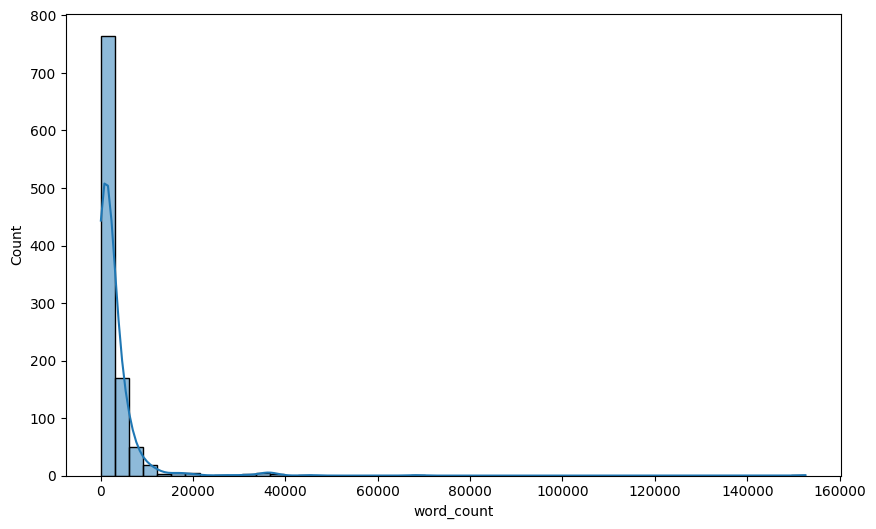

--Word Count Stats--


count      1027.000000
mean       2875.432327
std        6828.444160
min          70.000000
25%         515.000000
50%        1366.000000
75%        3190.500000
max      152592.000000
Name: word_count, dtype: float64

In [3]:
df["word_count"] = df["text_corpus"].apply(lambda x: len(re.findall(r"\b\w+\b", x.lower())))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="word_count",
            #  hue="lang",
             kde=True, palette="viridis", bins=50)
plt.show()
print("--Word Count Stats--")
df["word_count"].describe()

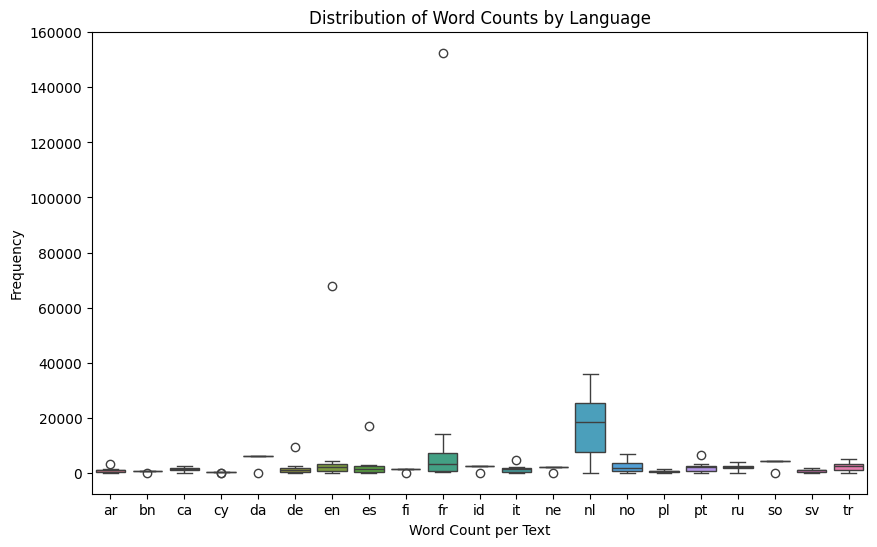

word_count                                                        \
          count          mean           std     min      25%      50%   
lang                                                                    
ar          6.0   1075.000000   1054.622966   240.0   373.75    713.0   
bn          1.0    561.000000           NaN   561.0   561.00    561.0   
ca          2.0   1518.500000   1475.731852   475.0   996.75   1518.5   
cy          2.0    137.500000     23.334524   121.0   129.25    137.5   
da          1.0   6232.000000           NaN  6232.0  6232.00   6232.0   
de         24.0   1569.166667   2523.669011    70.0   462.00    626.0   
en        665.0   2452.216541   4319.758583    79.0   522.00   1362.0   
es        126.0   1812.277778   2743.092417    78.0   278.25    696.0   
fi          1.0   1495.000000           NaN  1495.0  1495.00   1495.0   
fr        135.0   4953.792593  14023.364395    89.0   991.50   2083.0   
id          1.0   2479.000000           NaN  2479.0  2479.00   2479.0   
it          8.0   1645.375000   1500.056088   146.0   538.50   1465.5   
ne          1.0   1998.000000           NaN  1998.0  1998.00   1998.0   
nl          2.0  18444.500000  24821.569340   893.0  9668.75  18444.5   
no          3.0   2771.666667   3611.920449   595.0   687.00    779.0   
pl          4.0    719.750000    533.798573    95.0   421.25    718.5   
pt          6.0   2386.333333   2256.590141   209.0   752.75   2031.0   
ru          2.0   2429.500000   1984.848735  1026.0  1727.75   2429.5   
so          1.0   4218.000000           NaN  4218.0  4218.00   4218.0   
sv          2.0    876.500000   1018.940872   156.0   516.25    876.5   
tr          2.0   2551.000000   3232.892204   265.0  1408.00   2551.0   

                          
           75%       max  
lang                      
ar     1298.25    3030.0  
bn      561.00     561.0  
ca     2040.25    2562.0  
cy      145.75     154.0  
da     6232.00    6232.0  
de     1441.00    9385.0  
en     3018.00   67834.0  
es     2107.25   16810.0  
fi     1495.00    1495.0  
fr     4296.50  152592.0  
id     2479.00    2479.0  
it     2092.75    4667.0  
ne     1998.00    1998.0  
nl    27220.25   35996.0  
no     3860.00    6941.0  
pl     1017.00    1347.0  
pt     3034.75    6351.0  
ru     3131.25    3833.0  
so     4218.00    4218.0  
sv     1236.75    1597.0  
tr     3694.00    4837.0

In [5]:
by_lang_summary = df[["lang", "word_count"]].groupby("lang").describe()
plt.figure(figsize=(10, 6))
plt.title('Distribution of Word Counts by Language')
plt.xlabel('Word Count per Text')
plt.ylabel('Frequency')
sns.boxplot(data=by_lang_summary.T)
plt.show()
df[["lang", "word_count"]].groupby("lang").describe()

In [11]:
for corpus in df["text_corpus"].sample(n=3):
    print((re.findall(r"\b\w+\b", corpus.lower())))

['rt', 'edie', 'video', 'edie', 'visits', 'indonesia', 'to', 'see', 'asiapulppaper', 's', 'work', 'on', 'zero', 'deforestation', 'https', 't', 'co', '5vy2lgk6ft', 'cop21', 'https', 't', 'co', 'rt', 'aidagreenbury', 'the', 'edie_editor', 'investigated', 'landscape', 'approach', 'app', 'takes', 'to', 'forest', 'conservation', 'https', 't', 'co', '4fwslqzqyp', 'cop21', 'https', 'cop21', 'le', 'projet', 'd', 'accord', 'final', 'repoussé', 'à', 'samedi', 'https', 't', 'co', 'hvn9ve5p6p', 'via', 'france24', 'le', 'dieci', 'domande', 'e', 'le', 'dieci', 'risposte', 'su', 'cop21', 'https', 't', 'co', 'lqzjzoxjck', 'via', 'la_stampa', 'tuttogreen', 'cop21', 'an', 'agreement', 'project', 'in', '7', 'points', 'https', 't', 'co', '5qboaboguz', 'fr', 'via', 'lemondefr', 'cop21', 'un', 'projet', 'd', 'accord', 'en', '7', 'points', 'https', 't', 'co', '5qboaboguz', 'via', 'lemondefr', 'cop21', 'final', 'draft', 'drawn', 'up', 'in', 'paris', '3', 'key', 'issues', 'remain', 'https', 't', 'co', '8otjs80

In [14]:
for x in preprocess_tweets(df["text_corpus"].sample(3)):
    print(x)
    print(len(x.split()))

nicolas hulat french politician amp scientist say keep pushing government climate solution cop21 http co 65ohfg6jyx nicolas hulot speaks p2bcop21 outcome cop21 historic declaration http co e4o6aoc1cn wrote deal without legally binding clause shoddy target d12 cop21 http co ilj9dr0qnj deal real d12 cop21 http co hlxblzafnd deal real d12 cop21 http co ivdh3k6c4w knew well effect fossil fuel acknowledge publicly bus stop activism d12 cop21 http co g7zrrk53ba protester eiffel tower group calm sun go d12 cop21 http co 2ck90phnof spirit prayer action work say paul salish sea d12 cop21 http co 7pakvh2uoh sycamore legume tree preside large protest eiffel tower d12 cop21 http co iycl19f5co climate justice chant crowd small music show side man event eiffel tower d12 cop21 http co z31qg612kl 1 2 3 degree crime humanity chant d12 cop21 concert protest eiffel tower 1point5tostayalive music chant demonstration eiffel tower make clear 3 c state emergency climate d12 cop21 http co w0xptu0tmj gorgeous 